In [2]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean

import keyword

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

# 240306 두번째 수업

# LN1

In [3]:
# 파이썬에 내장 함수들, 파이썬에서 내가 정의해서 쓰면 안되는 단어
keyword.kwlist

['False',
 'None',
 'True',
 '__peg_parser__',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [4]:
aa=keyword.kwlist
aa

['False',
 'None',
 'True',
 '__peg_parser__',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [6]:
# aa가 몇개?
len(aa)

36

In [7]:
# list data structure 리스트 라는 데이터 형식
x=[1,2,3]

In [8]:
x

[1, 2, 3]

### Loop
- ** 제곱
- range(a,b) : a에서 b-1까지 정수 쭉 가져오기
- a%b : a를 b로 나눈 나머지를 가져와라
- ==a: a와 같은 것 만 가져와라

In [10]:
x=[1,2,3]

for i in x:
    y=i**2 #**은 제곱
    print(y)

1
4
9


In [12]:
# Q2: 1~100 가지 숫자 중 짝수만 프린트 하도록 하는 코드

for i in range(1,100):
    if i%2==0: # %: 앞숫자를 뒤숫자로 나누고 그 나머지가 0과 같으면(==0) 가져와라
        print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98


In [15]:
for i in range(1,101):
    if i%2==0:
        print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100


In [17]:
for i in range(1,101):
    if i%2==1:
        print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


In [18]:
# 절대값
abs(-3)

3

In [19]:
#절댓값
np.abs(-100)

100

In [20]:
np.sqrt(100)

10.0

In [21]:
sqrt(100)

NameError: name 'sqrt' is not defined

In [22]:
from numpy import *
sqrt(4)

2.0

<AxesSubplot:ylabel='Count'>

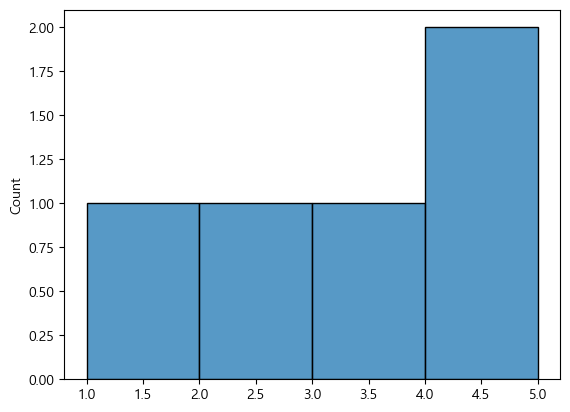

In [24]:
x=[1,2,3,4,5]
sns.histplot(x)

<AxesSubplot:ylabel='Count'>

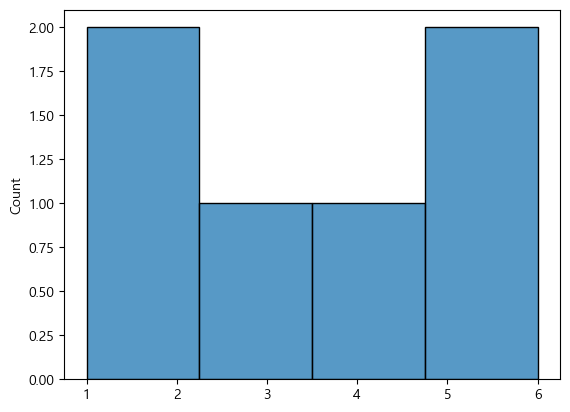

In [25]:
x=[1,2,3,4,5,6]
sns.histplot(x)

<AxesSubplot:>

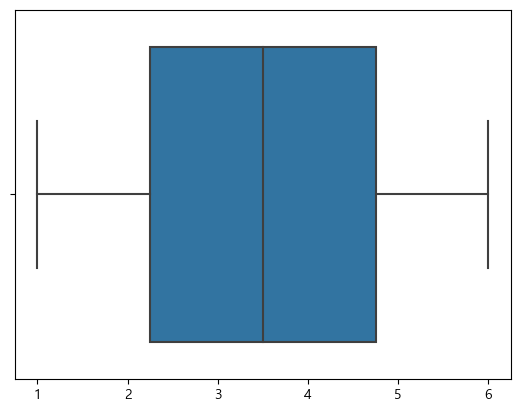

In [26]:
sns.boxplot(x)

# 세번째 수업 240311

# LN1

## 5 Data input and saving

In [28]:
data1=pd.read_excel('c:/temp/auto.xlsx')
data1

,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.5799999237060547,Domestic
0,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
1,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
2,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
3,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
4,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
68,VW Dasher,7140,23,4.0,2.5,12,2160,172,36,97,3.74,Foreign
69,VW Diesel,5397,41,5.0,3.0,15,2040,155,35,90,3.78,Foreign
70,VW Rabbit,4697,25,4.0,3.0,15,1930,155,35,89,3.78,Foreign
71,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [1]:
data2=pd.read_csv('c:/temp/barium.csv')
data2

NameError: name 'pd' is not defined

## 6 Data description 기술 통계 and calculation
- summary statistics
- 평균
- 표준편차
- skewness 왜도: 치우친 정도/양,0,음
- kurtosis 첨도: 뾰족한 정도/양,0,음/뾰족할 수록 꼬리 두꺼워짐(특이하게 양쪽 극단적인 값 많이 나타난다)/완만하면 꼬리 얇아진다.


In [30]:
data2

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462010,9578.3760,0,0,0,0,0,0,100.1,7830000128,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.4800,0,0,0,0,0,0,100.9,8819999744,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357500,9719.9004,0,0,0,0,0,0,101.1,8449999872,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421510,12920.9500,0,0,0,0,0,0,102.5,9240000512,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.4463,0,0,0,0,0,0,104.1,9150000128,...,0,0,1,0,0,0,0,0,0,1.170927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,589.422000,31686.8590,0,0,0,0,0,0,154.8,9420000256,...,0,0,0,0,1,0,0,0,0,1.860146
127,529.733520,16370.3400,0,0,0,0,0,0,155.3,8789999616,...,0,0,0,0,0,1,0,0,0,3.235935
128,968.037480,15653.9600,0,0,0,0,0,0,156.7,8990000128,...,0,0,0,0,0,0,1,0,0,6.183978
129,794.060000,45716.6090,0,0,0,0,0,0,157.5,8920000512,...,0,0,0,0,0,0,0,1,0,1.736918


In [31]:
print(data2)

          chnimp     bchlimp  befile6  affile6  afdec6  befile12  affile12  \
0     220.462010   9578.3760        0        0       0         0         0   
1      94.797997  11219.4800        0        0       0         0         0   
2     219.357500   9719.9004        0        0       0         0         0   
3     317.421510  12920.9500        0        0       0         0         0   
4     114.639000   9790.4463        0        0       0         0         0   
..           ...         ...      ...      ...     ...       ...       ...   
126   589.422000  31686.8590        0        0       0         0         0   
127   529.733520  16370.3400        0        0       0         0         0   
128   968.037480  15653.9600        0        0       0         0         0   
129   794.060000  45716.6090        0        0       0         0         0   
130  1087.806000  29580.5000        0        0       0         0         0   

     afdec12  chempi         gas  ...  apr  may  jun  jul  aug 

In [32]:
data2['chnimp']

0       220.462010
1        94.797997
2       219.357500
3       317.421510
4       114.639000
          ...     
126     589.422000
127     529.733520
128     968.037480
129     794.060000
130    1087.806000
Name: chnimp, Length: 131, dtype: float64

In [34]:
data2[['bchlimp']]

,bchlimp
0,9578.3760
1,11219.4800
2,9719.9004
3,12920.9500
4,9790.4463
...,...
126,31686.8590
127,16370.3400
128,15653.9600
129,45716.6090


In [35]:
data2['chnimp'].mean()

589.236995

In [36]:
data2['chnimp'].std()

349.54155187578453

In [37]:
# 실제로 표편 어케 구하는 지 알고 있어야함

In [38]:
data2['chnimp'].skew()

0.8582378497720544

In [39]:
data2['chnimp'].kurtosis()

0.6578490924101974

In [40]:
# 기술통계값 한꺼번에 나오게 하기
data2.describe()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,1.310000e+02,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,589.236995,19157.173172,0.045802,0.045802,0.045802,0.091603,0.091603,0.091603,122.831297,8.518550e+09,...,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,0.083969,3.272603
std,349.541552,7481.549846,0.209857,0.209857,0.209857,0.289572,0.289572,0.289572,14.235081,5.629280e+08,...,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,0.278407,1.985512
min,39.682999,8302.168000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.100000,6.900000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172642
25%,317.880995,13765.315000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.600000,8.210000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.805929
50%,535.718020,17716.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.200000,8.520000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.782447
75%,821.356755,23646.409000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.850000,8.860000e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.249461
max,1794.516000,45716.609000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,159.000000,1.020000e+10,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.232608


In [41]:
data2['chnimp'].describe()

count     131.000000
mean      589.236995
std       349.541552
min        39.682999
25%       317.880995
50%       535.718020
75%       821.356755
max      1794.516000
Name: chnimp, dtype: float64

### > 상관계수 correlation coefficient
- 두 변수가 같은 방향으로 움직이면: 양
- 두 변수가 다른 방향으로 움직이면: 음
- Pearson's correlation 씀 < 책 참고
- 상관계수 계산법: < 책 참고
- correlation, causality 차이 < 책 참고
- 다음 복습 때 넣기


In [42]:
# 두 변수의 상관계수 구하기
data2[['chnimp','bchlimp']].corr()

,chnimp,bchlimp
chnimp,1.00000,0.27206
bchlimp,0.27206,1.00000


In [43]:
# 0.27206: 양수 -> 두 변수 정비례관계, 양의 상관관계

### > numpy 모듈 활용
#### - Series 함수 사용해서 직접 데이터 입력하기

In [53]:
cashflow=pd.Series(index=[0,1,2,3,4,5],name='Cashflow',data=[-100,5,5,5,5,105])
cashflow

0   -100
1      5
2      5
3      5
4      5
5    105
Name: Cashflow, dtype: int64

### > 내부수익률 IRR Internal Rate of Return 계산법
- 투자안을 보고 투자를 결정하는 방법 중 하나
- 내부수익률 정의: net preseent value(순현재가치, npv)을 0으로 만드는 할인율
- 내부수익률이 높을 수록 투자해야함
- 이자비용보다 IRR이 높다면 '투자'
- numpy 안에 IRR 계산해주는 함수 있음
- pip install numpy_financial

In [54]:
# IRR 계산하는 함수: npf.irr()

npf.irr(cashflow)

0.04999999999999982

In [55]:
# 내부수익률(IRR)= 약 4.9%
# 현재 금리가 4.9%보다 낮다면 투자해야함

# 네번째 수업 240313

# LN2
# 주택실거래가 데이터분석(1)


## 1 데이터의 대표값과 퍼진 정도 dispersion
- 통계학은 기술통계학과 추론통계학으로 나뉨
- 기술통계학: 다음 복습 때 찾아서 넣기
- 추론통계학: 모집단에서 추출된 표본에서 얻은 통계량을 의미 해석해 모수를 추론하고자 함 ?????????? 필추

- 아래 필추
- 범주형 변수의 경우 최빈값이 대푯값으로 사용될 수 있음
- 평균은 극단치에 영향 받음
- 중앙값은 극단치에 영향 덜받음
- 극단치가 존재하면 대푯값은 중앙값이 더 적절
- 극단치 영향을 줄이고 평균을 계산하기 위해 trimmed mean 구할 수 있음

In [57]:
data=np.array([1,2,3,4,5,6,200])
data.mean() # 전체평균: 극단치에 영향 받음

31.571428571428573

In [58]:
# trimmed mean 구하기
# 앞 뒤 0.05씩 자르고, 총 99%로 trimmed mean 구해보자
trim_mean(data,proportiontocut=0.05)

31.571428571428573

In [59]:
trim_mean(data,proportiontocut=0.1)

31.571428571428573

In [60]:
trim_mean(data,proportiontocut=0.15)

4.0

In [61]:
trim_mean(data,proportiontocut=0.2)

4.0

### > 데이터 퍼진 정도
- 필추
- 표편, 분산


### > MAD Median Absolute Deviation 중앙값 절대편차
- 평균이 극단치 영향을 받기 때문에, 표준편차 역시 극단치에 영향 받음
- 이를 보완하기 위해 극단치 영향을 덜 받는 퍼진 정도 -> '중앙값 절대편차'
- 각 값에서 중앙값 빼고, 그 값들의 중앙값 구한다
- 공식은 필추, 필기 참고

In [62]:
df=pd.read_csv('c:/temp/LN2_data1.csv')
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [63]:
# df: 서초구에서 거래된 주택 실거래가 데이터
# 평수가 섞여 있으니 price를 바로 평균 내면 의미 없음
# 평당 가격을 봐야함. 
# 한 평=3.3m2
# 평당 가격 보는 변수: price_pyung

In [64]:
# price의 표편
df['price'].std()

95597.31932419787

In [65]:
# MAD
stats.median_abs_deviation(df['price'])

63125.0

In [66]:
df['price_pyung'].std()

3221.817175665056

In [67]:
# 강의 확인
# 내용이 어케되는거지?

## 2 히스토그램과 사분위수

- 히스토그램이 오른쪽으로 긴 꼬리 모양: 중<평
- 히스토그램이 좌우대치인 분포: 중앙값과 평균값 거의 유사
- 백분위수 percentile 필추
- 4분위수 quantile

In [69]:
# 2022년 가계금융복지조사

df2=pd.read_csv('c:/temp/LN2_data2.csv')
df2

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2
1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3
2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2
3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2
4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2


In [70]:
# sex: 가구주의 성별
# income: 가구의 소득, ex. 17720: 1억 7천 7백 20 만원

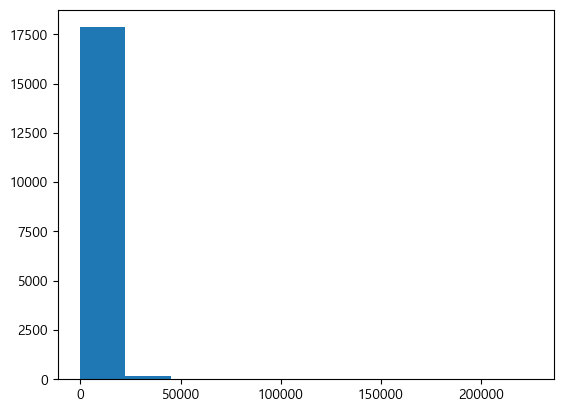

In [71]:
# 히스토그램 그리기

plt.hist(df2['income'])
plt.show()

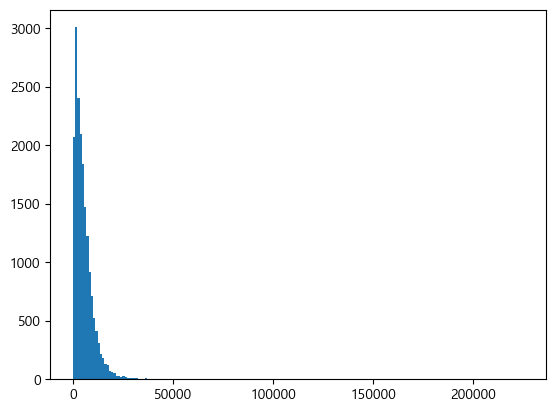

In [72]:
# 그릴 때, 막대기 몇 개 나올지 정하는 옵션 넣기
plt.hist(df2['income'],bins=200)
plt.show()

In [73]:
# 오른쪽으로 꼬리가 긴 분포
# 적은 수지만, 돈 많이 버는 사람들 있다

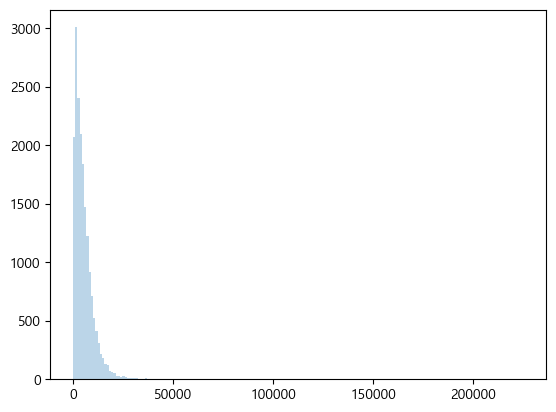

In [74]:
# alpha: 투명도 지정
plt.hist(df2['income'],bins=200,alpha=0.3)
plt.show()

In [75]:
# 사분위수 계산하기

df2['income'].quantile(0.25)

2026.0

In [76]:
# 하위 25%의 소득이 2026만원

In [77]:
df2['income'].quantile(0.75)

7331.75

In [78]:
# 상위 25%의 소득이 7331만원

In [79]:
# IQR = 사분위수 범위: 3사분위와 1사분위 값의 차이
IQR=df2['income'].quantile(0.75)-df2['income'].quantile(0.25)
print(IQR)

5305.75


In [80]:
# IQR <- data의 dispersion을 측정하는 방법
# IQR 클수록 사람들 분포가 펼쳐져 있음 
# = 돈 많이 버는 사람과 적게 버는 사람들의 격차가 크다.

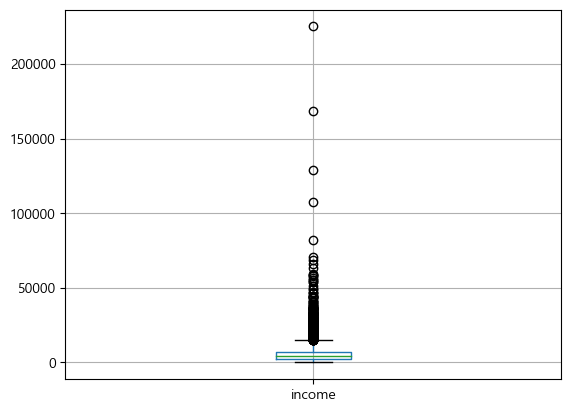

In [81]:
# Boxplot 그리기

df2.boxplot(column=['income'])
plt.show()

In [83]:
# 위에 boxplot 해석 필참해서 적기!!!!

## 3 데이터 형식과 반복문

- 데이터 형식: list, tuple 알아보자
- list:
- tuple:

- 필기참고

In [84]:
# list

x=[10,'economics', False]
x

[10, 'economics', False]

In [86]:
# x의 데이터형식
type(x)

list

In [90]:
# x중 첫번째 값 불러오기
# 파이썬은 0부터 시작함
x[0]

10

In [89]:
x[1]

'economics'

In [91]:
x[0:1]

[10]

In [92]:
x[1:2]

['economics']

In [93]:
x[0:3]

[10, 'economics', False]

In [94]:
x[0:2]

[10, 'economics']

In [95]:
x[0:5]

[10, 'economics', False]

In [96]:
x[-1]
# 음수 쓰면 뒤쪽부터 가져올 수 있음

False

In [98]:
# list는 값 변경하거나 추가할 수 있음

# 추가하기: append()

x.append(21)
x

[10, 'economics', False, 21, 21]

In [100]:
# 변경하기

# x의 0번째 값을 15로 바꿔라
x[0]=15
x

[15, 'economics', False, 21, 21]

In [102]:
# 왜 21 여러번 나오지????????????
# 강의 참고
# tuple 이어서 함

# 240318 

# LN2 이어서

### > list tuple 차이점
- list 값 추가, 변경 가능
- tuple은 정의 하면 변경 불가능
- tuple은 append 사용불가능

In [103]:
# Tuple 정의: 같은 형식으로 된 거 , 숫자만 , 글자만 등?? 맞나??
# 필기 참고

In [104]:
x=(1,2)
type(x)

tuple

In [105]:
x

(1, 2)

In [106]:
x[2]=4

TypeError: 'tuple' object does not support item assignment

In [107]:
x.append(5)

AttributeError: 'tuple' object has no attribute 'append'

### > 반복문
- for
- range *범위 주의
- while

In [108]:
animals=['dog','cat','bird']
type(animals)

list

In [109]:
for i in animals:
    print(i)

dog
cat
bird


In [110]:
k=len(animals)
k

3

In [112]:
# range 사용해서 반복문 쓰기
# ?? 뭐지?? 다음에 보고 
for i in range(k):
    print(animals[i])

dog
cat
bird


In [116]:
# while 사용해서 loop 반복문 실행하기

i=1
while i<5:
    print(i)
    i=i+1

1
2
3
4


In [117]:
# 0~9까지 숫자를 2를 매번 곱해서 리스트로 생성하자

for i in range(10):
    x=i*2
    print(x)

0
2
4
6
8
10
12
14
16
18


In [118]:
# Q11: 실행된 값을 모아서 리스트로 만들려면

y=[] #비어있는 리스트 object
for i in range(10):
    x=i*2
    y.append(x)
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [119]:
# list comprehenshion 이용해서 Q11 해보자
# list comprehension: loop 구문을 list 안에서 정의할 수 있는 것

y1=[2*x for x in range(10)]
y1

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## 4 API 이용한 주택실거래가 데이터 수집


#### > 아파트 매매거래 데이터 api

In [120]:
# 강의 다시 보기

In [121]:
# 표에 있는 걸 미리 정의 해야 함
# 표가 뭐지>? 그냥 그 강의노트 보고 그랬던거 같은데

In [122]:
# http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade? 구 코드 LAWD_CD=11110& 달 DEAL_YMD=202401&numOfRows=1000&serviceKey=29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D
# numOfRows: 링크 들어가서 보면 밑에 나옴

In [123]:
Servicekey="29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D"
month=202401
gu_code=11110
numOfRows=1000
url="http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD="+str(gu_code)+"&DEAL_YMD="+str(month)+"&numOfRows="+str(numOfRows)+"&serviceKey="+Servicekey

In [124]:
print(url)

http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD=11110&DEAL_YMD=202401&numOfRows=1000&serviceKey=29jTU1S%2B7bDI1Rb2LV0S5D0d3Xn%2Fji9T3k%2FWjsLR%2FyI9O3wEU0atKsr9hj9ATsfIpKgWmV8k8Ll67O%2F73Nyj6w%3D%3D


In [125]:
# url 불러오기
result=urlopen(url)
house=BeautifulSoup(result,'lxml-xml')
house

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      42,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 익선동</법정동><아파트>현대뜨레비앙</아파트><월>1</월><일>30</일><전용면적>48.54</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>55</지번><지역코드>11110</지역코드><층>2</층><해제사유발생일> </해제사유발생일

In [127]:
# 위에 걸 같은 변수 끼리 엑셀처럼 묶어 보려면...
# 위에 대충 읽어보면 item으로 시작해서 끝남.. 

te=house.find_all("item")
te
# 이게 뭐지?? 강의 보기!!!!!!!!!!!1

[<item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>      42,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 익선동</법정동><아파트>현대뜨레비앙</아파트><월>1</월><일>30</일><전용면적>48.54</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>55</지번><지역코드>11110</지역코드><층>2</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>      46,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2024</년><동> </동><등기일자>24.02.29</등기일자><매도자>개인

In [131]:
# 하나 매물: <item><거래금액>     192,000</거래금액><거래유형>중개거래</거래유형><건축년도>2004</건축년도><년>2024</년><동> </동><등기일자> </등기일자><매도자>개인</매도자><매수자>개인</매수자><법정동> 내수동</법정동><아파트>경희궁의아침3단지</아파트><월>1</월><일>13</일><전용면적>149</전용면적><중개사소재지>서울 종로구</중개사소재지><지번>72</지번><지역코드>11110</지역코드><층>4</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>
# url 들어가면 맨 아래 보면, <totalCount>18</totalCount> 보면 총 매물이 18개 인 걸 알 수 있음
# len(te)=19? 

In [132]:
len(te)

18

In [133]:
# 맞네

In [130]:
data=[]
for i in range(len(te)):
    price=te[i].거래금액.string.strip()
    # .string.strip(): 거래금액 19200을 숫자 말고 문자로 가져와라
    apt_name=te[i].아파트.string.strip()
    total=[price,apt_name] 
    # Price랑 apt_name 묶어서 리스트로 나타내자
    data.append(total)
print(data)

[['192,000', '경희궁의아침3단지'], ['192,000', '경희궁의아침3단지'], ['42,000', '현대뜨레비앙'], ['46,000', '리치캐슬아파트'], ['57,400', '송림아마레스아파트'], ['57,500', '창신쌍용2'], ['13,500', '삼전솔하임4차'], ['95,000', '종로센트레빌'], ['101,300', '종로청계힐스테이트'], ['80,000', '종로청계힐스테이트'], ['200,000', '경희궁자이(3단지)'], ['195,000', '경희궁자이(2단지)'], ['200,000', '경희궁자이(2단지)'], ['156,000', '경희궁자이(2단지)'], ['135,000', '롯데캐슬로잔'], ['70,500', '일성빌라트'], ['39,000', '무악다온채'], ['101,000', '인왕산아이파크']]


In [134]:
# 동이름도 넣어보자
data1=[]
for i in range(len(te)):
    price=te[i].거래금액.string.strip()
    apt_name=te[i].아파트.string.strip()
    dong_name=te[i].법정동.string.strip()
    total1=[price,apt_name,dong_name] 
    data1.append(total1)
print(data1)

[['192,000', '경희궁의아침3단지', '내수동'], ['192,000', '경희궁의아침3단지', '내수동'], ['42,000', '현대뜨레비앙', '익선동'], ['46,000', '리치캐슬아파트', '명륜1가'], ['57,400', '송림아마레스아파트', '명륜1가'], ['57,500', '창신쌍용2', '창신동'], ['13,500', '삼전솔하임4차', '숭인동'], ['95,000', '종로센트레빌', '숭인동'], ['101,300', '종로청계힐스테이트', '숭인동'], ['80,000', '종로청계힐스테이트', '숭인동'], ['200,000', '경희궁자이(3단지)', '평동'], ['195,000', '경희궁자이(2단지)', '홍파동'], ['200,000', '경희궁자이(2단지)', '홍파동'], ['156,000', '경희궁자이(2단지)', '홍파동'], ['135,000', '롯데캐슬로잔', '평창동'], ['70,500', '일성빌라트', '평창동'], ['39,000', '무악다온채', '무악동'], ['101,000', '인왕산아이파크', '무악동']]


In [135]:
# 이렇게 뽑아내 list data를 excel 혹은 csv 파일로 내보내자

In [136]:
# csv 파일로 내보내기

# 1단계: list를 데이터 프레임으로 생성 using data frame in pandas
# 2단계: pandas data frame 을 csv 파일로 내보낸다

In [137]:
temp=pd.DataFrame(data1,columns=['price','apt_name','dong_name'])
temp

,price,apt_name,dong_name
0,"192,000",경희궁의아침3단지,내수동
1,"192,000",경희궁의아침3단지,내수동
2,"42,000",현대뜨레비앙,익선동
3,"46,000",리치캐슬아파트,명륜1가
4,"57,400",송림아마레스아파트,명륜1가
5,"57,500",창신쌍용2,창신동
6,"13,500",삼전솔하임4차,숭인동
7,"95,000",종로센트레빌,숭인동
8,"101,300",종로청계힐스테이트,숭인동
9,"80,000",종로청계힐스테이트,숭인동


In [138]:
# csv 파일로 내보내기
temp.to_csv("c:/temp/house_price100.csv")

# 240320

# LN3
# 주택실거래가 데이터분석(2)

- series : array 같이 한 칼럼만 있는 데이터 유형
- dataframe: 여러 칼럼 가짐

In [140]:
# 데이터 유형 중 Series 만들어보자
s=pd.Series(np.random.randn(4),name='return')
# 무작위 숫자 4개를 정규분포(randn: 보통 -3에서 3까지 값을 가진다)에서 생성한다
# return이라는 이름으로 저장한다
s

0   -0.889906
1    0.014414
2    0.244517
3   -1.404537
Name: return, dtype: float64

In [141]:
type(s)

pandas.core.series.Series

In [142]:
# pandas 로 데이터 프레임 만들기

# 먼저 list 생성
data=[[1,2,3],[4,5,6],[7,8,9]]

# pandas로 위의 리스트롤 data frame으로 바꾸자
df2=pd.DataFrame(data)
df2

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [143]:
# 칼럼 이름 바꾸고 싶으면 ,columns= 하고 이름을 바꾼다
df1=pd.DataFrame(data,columns=['a','b','c'])
df1

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [149]:
temp2=pd.DataFrame(house)
temp2
#???

,0,1
0,"[[00], [NORMAL SERVICE.]]","[[[<거래금액> 192,000</거래금액>, <거래유형>중개거래</거래유형..."


In [150]:
# 아니 house_price.csv로 하면 되긴 하는데,
# api 불러온걸로는 어떻게 하지?
# api 공부해야함

In [151]:
df=pd.read_csv("c:/temp/house_price.csv")
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332


In [152]:
# 196 rows: 거래된 수가 196건이라는 뜻

In [154]:
# 칼럼 보기
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'price', 'built_yr', 'dong_name',
       'apt_name', 'size', 'gu_code', 'size_pyung', 'price_pyung'],
      dtype='object')

In [157]:
# 칼럼 하나 삭제
df2=df.drop('Unnamed: 0',axis=1)
df2

,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung
0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420
1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465
2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734
3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994
4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217
...,...,...,...,...,...,...,...,...,...,...,...
191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168
192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033
193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332
